In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
pwd

'/home/wsuser/work'

In [1]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='0lPukoNdevtkeslHxtccA-Kygb0NiYAdKseTvCZoQWcC',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'classificationofarrhythmia-donotdelete-pr-q8e5earcdbnhou'
object_key = 'Classification of Arrhythmia.zip'

streaming_body_4 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [4]:
from io import BytesIO
import zipfile
unzip=zipfile.ZipFile(BytesIO(streaming_body_4.read()),'r')
file_paths=unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [5]:
import os
filename=os.listdir('/home/wsuser/work/data/train')


In [120]:
cd /content/drive/MyDrive/Project Development Phase

[Errno 2] No such file or directory: '/content/drive/MyDrive/Project Development Phase'
/home/wsuser/work


In [6]:
ls

data/


Import the ImageDataGenerator library

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Configure ImageDataGenerator Class

In [8]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,vertical_flip=True,horizontal_flip=True)

In [9]:
test_data=ImageDataGenerator(rescale=1./255)

Apply ImageDataGenerator functionality to trainset and testset

In [10]:
x_train=train_datagen.flow_from_directory(r"/home/wsuser/work/data/train",target_size=(64,64),class_mode="categorical",batch_size=128)

Found 15341 images belonging to 6 classes.


In [11]:
x_test=test_data.flow_from_directory(r"/home/wsuser/work/data/test",target_size=(64,64),class_mode="categorical",batch_size=128)

Found 6825 images belonging to 6 classes.


In [12]:
x_train.class_indices

{'Left Bundle Branch Block': 0,
 'Normal': 1,
 'Premature Atrial Contraction': 2,
 'Premature Ventricular Contractions': 3,
 'Right Bundle Branch Block': 4,
 'Ventricular Fibrillation': 5}

MODEL BUILDING

Import the libraries

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

Initialize the model

In [14]:
model=Sequential()

Adding CNN layers

In [15]:
model.add(Convolution2D(32,(3,3),activation="relu",strides=(1,1),input_shape=(64,64,3)))

In [16]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [17]:
model.add(Flatten())

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


Adding Dense layer

Hidden layer

In [19]:
model.add(Dense(500,activation="relu"))

In [20]:
model.add(Dense(500,activation="relu"))

Output layer

In [21]:
model.add(Dense(6,activation="softmax"))

Configure the learning process

In [22]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [23]:
len(x_train)

120

Train the model

In [24]:
model.fit(x_train,epochs=5,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test))

Epoch 1/5
120/120 [==============================] - 106s 878ms/step - loss: 1.2843 - accuracy: 0.5607 - val_loss: 1.1161 - val_accuracy: 0.6265
Epoch 2/5
120/120 [==============================] - 100s 829ms/step - loss: 0.6282 - accuracy: 0.8011 - val_loss: 0.8185 - val_accuracy: 0.7204
Epoch 3/5
120/120 [==============================] - 101s 836ms/step - loss: 0.4209 - accuracy: 0.8640 - val_loss: 0.5983 - val_accuracy: 0.8034
Epoch 4/5
120/120 [==============================] - 103s 859ms/step - loss: 0.3148 - accuracy: 0.8988 - val_loss: 0.5870 - val_accuracy: 0.8196
Epoch 5/5
120/120 [==============================] - 99s 824ms/step - loss: 0.2547 - accuracy: 0.9207 - val_loss: 0.6052 - val_accuracy: 0.8234


In [38]:
model.fit(x_train,epochs=5,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test))

Epoch 1/5
120/120 [==============================] - 102s 845ms/step - loss: 0.2971 - accuracy: 0.9044 - val_loss: 0.7092 - val_accuracy: 0.8287
Epoch 2/5
120/120 [==============================] - 104s 864ms/step - loss: 0.2960 - accuracy: 0.9039 - val_loss: 0.5393 - val_accuracy: 0.8292
Epoch 3/5
120/120 [==============================] - 102s 850ms/step - loss: 0.2721 - accuracy: 0.9127 - val_loss: 0.5500 - val_accuracy: 0.8305
Epoch 4/5
120/120 [==============================] - 103s 859ms/step - loss: 0.2114 - accuracy: 0.9333 - val_loss: 0.5432 - val_accuracy: 0.8580
Epoch 5/5
120/120 [==============================] - 101s 841ms/step - loss: 0.1704 - accuracy: 0.9462 - val_loss: 0.4101 - val_accuracy: 0.8771


In [39]:
model.fit(x_train,epochs=2,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test))

Epoch 1/2
120/120 [==============================] - 101s 842ms/step - loss: 0.1489 - accuracy: 0.9536 - val_loss: 0.6319 - val_accuracy: 0.8614
Epoch 2/2
120/120 [==============================] - 102s 847ms/step - loss: 0.1258 - accuracy: 0.9592 - val_loss: 0.5019 - val_accuracy: 0.8561


In [25]:
model.fit(x_train,epochs=5,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test))

Epoch 1/5
120/120 [==============================] - 100s 833ms/step - loss: 0.2114 - accuracy: 0.9330 - val_loss: 0.5650 - val_accuracy: 0.8484
Epoch 2/5
120/120 [==============================] - 99s 826ms/step - loss: 0.2273 - accuracy: 0.9291 - val_loss: 0.4384 - val_accuracy: 0.8645
Epoch 3/5
120/120 [==============================] - 99s 821ms/step - loss: 0.2018 - accuracy: 0.9382 - val_loss: 0.6004 - val_accuracy: 0.8667
Epoch 4/5
120/120 [==============================] - 99s 824ms/step - loss: 0.1443 - accuracy: 0.9544 - val_loss: 0.5635 - val_accuracy: 0.8636
Epoch 5/5
120/120 [==============================] - 99s 821ms/step - loss: 0.1242 - accuracy: 0.9613 - val_loss: 0.4690 - val_accuracy: 0.8881


Save the model

In [65]:
model.save('arrhythmia.h5')

In [66]:
!tar -zcvf arrhythmia.tgz arrythmia.h5

arrythmia.h5


In [67]:
ls

arrhythmia.h5   arrhythmia.tgz  coa.h5      coa.tgz
arrhythmia.png  arrythmia.h5    coa.tar.gz  data/


In [130]:
!pip install watson-machine-learning-client --upgrade

In [162]:
from ibm_watson_machine_learning import APIClient
wml_credentials={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"0mKIzdxdZWk_ll_5nE-x7ZePV6HfLyBbViNzQbKHJZ6y"
}
client=APIClient(wml_credentials)

In [163]:
def guid_from_space(client,space_name):
    space=client.spaces.get_details()
    return next(item for item in space['resources'] if item['entity']['name']==space_name)['metadata']['id']

In [164]:
space_uid=guid_from_space(client,'arrhythmia')
print("spaceid"+" "+space_uid)

StopIteration: 

In [134]:
client.set.default_space(space_uid)

'SUCCESS'

In [135]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [136]:
software_spec_id=client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')
software_spec_id

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [137]:
model_details=client.repository.store_model(model="arrhythmia.tgz",meta_props={
    client.repository.ModelMetaNames.NAME:"CNN",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_id})
model_id=client.repository.get_model_uid(model_details)


This method is deprecated, please use get_model_id()


/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/ibm_watson_machine_learning/repository.py:1453: UserWarning: This method is deprecated, please use get_model_id()
  warn("This method is deprecated, please use get_model_id()")


In [138]:
model_id

'7c35b891-db92-498f-b3f0-ad2dddd0b178'

In [139]:
client.repository.download(model_id,'arrhythmia.tar.gz')

File with name: 'arrhythmia.tar.gz' already exists.


WMLClientError: File with name: 'arrhythmia.tar.gz' already exists.

Connect with ibm

In [140]:
from keras.models import load_model
from keras.preprocessing import image

In [141]:
model=load_model('arrhythmia.h5')

In [142]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='0lPukoNdevtkeslHxtccA-Kygb0NiYAdKseTvCZoQWcC',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'classificationofarrhythmia-donotdelete-pr-q8e5earcdbnhou'
object_key = 'fig_5897.zip'

streaming_body_8 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [143]:
from io import BytesIO
import zipfile
unzip=zipfile.ZipFile(BytesIO(streaming_body_8.read()),'r')
file_paths=unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [144]:
ls

arrhythmia.h5   arrhythmia.tar.gz  arrythmia.h5  coa.tar.gz  data/
arrhythmia.png  arrhythmia.tgz     coa.h5        coa.tgz     fig_5897.png


In [145]:
img=image.load_img('/home/wsuser/work/fig_5897.png',target_size=(64,64))

In [146]:
import numpy as np
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)

In [147]:
pred=model.predict(x)

In [152]:
pred[0]

array([1., 0., 0., 0., 0., 0.], dtype=float32)

In [153]:
index=['Left Bundle Branch Block',
 'Normal',
 'Premature Atrial Contraction',
 'Premature Ventricular Contractions',
 'Right Bundle Branch Block',
 'Ventricular Fibrillation']

In [154]:
index[np.argmax(pred)]

'Left Bundle Branch Block'

In [155]:
wml_credentials={
    "url" : "https://eu-gb.ml.cloud.ibm.com",
    "apikey" : "0mKIzdxdZWk_ll_5nE-x7ZePV6HfLyBbViNzQbKHJZ6y"
}

In [156]:
client=APIClient(wml_credentials)

In [157]:
client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
--  ----  -------
ID  NAME  CREATED
--  ----  -------


In [158]:
client.spaces.get_details()

{'resources': []}

In [159]:
def guid_from_space_name(client,space_name):
  space=client.spaces.get_details()
  return next(item for item in space['resources'] if item['entity']['name'] == space_name)['metadata']['id']

In [165]:
space_uid=guid_from_space_name(client,'abc')
print("space_id"+space_uid)

StopIteration: 

In [166]:
client.set.default_space(space_uid)

'SUCCESS'

In [167]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [168]:
software_space_uid=client.software_specifications.get_uid_by_name("tensorflow_rt22.1-py3.9")

In [172]:
model_id=client.repository.get_model_id(model_details)

In [173]:
model_id

'7c35b891-db92-498f-b3f0-ad2dddd0b178'

In [174]:
client.repository.download(model_id,'arrhythmia.gb')

Successfully saved model content to file: 'arrhythmia.gb'


'/home/wsuser/work/arrhythmia.gb'

Testing the model

In [175]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

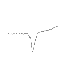

In [176]:
img

In [177]:
x=image.img_to_array(img)

In [178]:
x=np.expand_dims(x,axis=0)

In [179]:
pred=model.predict(x)

In [180]:
pred

array([[1., 0., 0., 0., 0., 0.]], dtype=float32)

In [181]:
index=['Left Bundle Branch Block',
 'Normal',
 'Premature Atrial Contraction',
 'Premature Ventricular Contractions',
 'Right Bundle Branch Block',
 'Ventricular Fibrillation']

In [182]:
index[np.argmax(pred)]

'Left Bundle Branch Block'